# Exercises - June 7 2019

### Day 13
### June 7 2019 
### P. Sudarshan Kumar

## Mission 1: Introduction to the Data Set

### Instructions

       ● Read imports-85.data into a dataframe. If you read in the file using
        pandas.read_csv() without specifying any additional parameter values, you'll notice
        that the column names don't match the ones in the dataset's documentation.
        
        ● Determine which columns are numeric and can be used as features and which column is
        the target column and which columns can be converted into numeric.
      

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import operator
def read(filename):
    df = pd.read_csv(filename)
    return df
df = read('Data Files/imports-85.csv')
rand = np.random.permutation(df.index)
df = df.loc[rand]
df.head()

,%symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine_location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
150,1,87,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,35,39,5348
135,2,104,saab,gas,std,four,sedan,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.3,110,5250,21,28,15510
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485


## Mission 2: Data Cleaning

### Instructions

        ● Use the DataFrame.replace() method to replace all of the "?" values with the
        numpy.nan missing value.
        
        ● Because ? is a string value, columns containing this value were cast to the pandas object
        data type (instead of a numeric type like int or float). After replacing the ? values,
        determine which columns need to be converted to numeric types. You can use either the
        DataFrame.astype() or the Series.astype() methods to convert column types.
        
        ● Return the number of rows that have a missing value for the normalized-losses column.
        This can be determined using Dataframe.info(). Determine how you should handle this column. 
        You could:
        
            ○ Replace the missing values using the average values from that column.

            ○ Drop the rows entirely (especially if other columns in those rows have missing
            values).

            ○ Drop the column entirely.

        ● Explore the missing value counts for the other numeric columns and handle any
        missing values.
        
        ● Of the columns you decided to keep, normalize the numeric ones so all values range
        from 0 to 1.

In [2]:
df =df.replace('?',np.nan)
df = df.replace('',np.nan)
df = df.dropna()
num = df['num-of-cylinders'].unique().tolist()
col_list = ['%symboling','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-type','fuel-system']
df['num-of-cylinders'].replace(num,[4,5,6,3,8],inplace = True)
df.drop(['normalized-losses','engine_location'], axis=1, inplace=True)
le = LabelEncoder()
dfle = df
for col in col_list:
    dfle[col] = le.fit_transform(df[col])
dfle.head()

,%symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
150,3,15,1,0,1,2,1,95.7,158.7,63.6,...,92,1,3.05,3.03,9.0,62,4800,35,39,5348
135,4,13,1,0,0,3,1,99.1,186.6,66.5,...,121,4,3.54,3.07,9.3,110,5250,21,28,15510
200,1,17,1,0,0,3,2,109.1,188.8,68.9,...,141,4,3.78,3.15,9.5,114,5400,23,28,16845
3,4,0,1,0,0,3,1,99.8,176.6,66.2,...,109,4,3.19,3.4,10.0,102,5500,24,30,13950
202,1,17,1,0,0,3,2,109.1,188.8,68.9,...,173,4,3.58,2.87,8.8,134,5500,18,23,21485


In [3]:
dfle['price'] = dfle.price.astype('int32')
dfle['horsepower'] = dfle.horsepower.astype('int32')
dfle['peak-rpm'] = dfle['peak-rpm'].astype('int32')
dfle['bore'] = dfle.bore.astype('float64')
dfle['stroke'] = dfle.stroke.astype('float64')
dfle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 150 to 143
Data columns (total 24 columns):
%symboling           159 non-null int64
make                 159 non-null int32
fuel-type            159 non-null int32
aspiration           159 non-null int32
num-of-doors         159 non-null int32
body-style           159 non-null int32
drive-wheels         159 non-null int32
wheel-base           159 non-null float64
length               159 non-null float64
width                159 non-null float64
height               159 non-null float64
curb-weight          159 non-null int64
engine-type          159 non-null int32
num-of-cylinders     159 non-null int64
engine-size          159 non-null int64
fuel-system          159 non-null int32
bore                 159 non-null float64
stroke               159 non-null float64
compression-ratio    159 non-null float64
horsepower           159 non-null int32
peak-rpm             159 non-null int32
city-mpg             159 non-null int64

In [4]:
normalized_listings = (dfle - dfle.mean()) / (dfle.std())
df_norm = normalized_listings
columns = df_norm.columns
columns = columns.to_list()
columns.pop()
df_norm.head()

,%symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
150,0.221401,0.979100,0.321732,-0.450843,1.214512,-0.857295,-0.448233,-0.496215,-1.190109,-1.030630,...,-0.893818,-0.875936,-0.935625,-0.699765,-0.298532,-1.101499,-0.673823,1.390485,1.071069,-1.037407
135,1.059564,0.578387,0.321732,-0.450843,-0.818198,0.453377,-0.448233,0.161754,1.231098,0.458166,...,0.058225,1.040676,0.897277,-0.564120,-0.221401,0.461073,0.292350,-0.905672,-0.631931,0.691455
200,-1.454924,1.379813,0.321732,-0.450843,-0.818198,0.453377,1.427268,2.096957,1.422018,1.690273,...,0.714807,1.040676,1.795025,-0.292831,-0.169980,0.591288,0.614408,-0.577650,-0.631931,0.918578
3,1.059564,-2.026245,0.321732,-0.450843,-0.818198,0.453377,-0.448233,0.297218,0.363282,0.304152,...,-0.335724,1.040676,-0.411938,0.554950,-0.041428,0.200645,0.829113,-0.413638,-0.322294,0.426052
202,-1.454924,1.379813,0.321732,-0.450843,-0.818198,0.453377,1.427268,2.096957,1.422018,1.690273,...,1.765338,1.040676,1.046902,-1.242345,-0.349953,1.242359,0.829113,-1.397706,-1.406022,1.707982


## Mission 3: Univariate Model

### Instructions
        ● Create a function, named knn_train_test() that consists of the training and simple
        validation process. This function should have 3 parameters -- training column name,
        target column name, and the dataframe object.

            ○ This function should split the data set into a training and test set.

            ○ Then, it should instantiate the KNeighborsRegressor class, fit the model on the
            training set, and make predictions on the test set.

            ○ Finally, it should calculate the RMSE and return that value.

        ● Use this function to train and test univariate models(model having only one column for prediction) 
        using the different numeric columns in the data set. Which column performed the best using the default
        k value?
        
        ● Modify the knn_train_test() function to accept a parameter for the k value.
        
            ○ Update the function logic to use this parameter.

            ○ For each numeric column, create, train, and test a univariate model using the
            following k values (1, 3, 5, 7, and 9). Visualize the results using a scatter plot or a
            line plot.

In [5]:
rmse_values = []
def knn_train_test(training_col,target_col,dataframe):
    train_df, test_df = train_test_split(dataframe, test_size= 0.2, random_state = 0)
    knn = KNeighborsRegressor(algorithm='brute')
    train_features = train_df[[training_col]]
    train_target = train_df[[target_col]]
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[[training_col]])
    rmse_value = np.sqrt(mean_squared_error(test_df[target_col], predictions))
    return rmse_value

for col in columns:
    rmse_values.append(knn_train_test(col,'price',df_norm))
       
dictionary = dict(zip(columns, rmse_values))    
tups = sorted(dictionary.items(), key= operator.itemgetter(1))    
dictionary = dict(tups)
best_features = list(dictionary.keys())

In [6]:
def knn_train_test(training_col,target_col,dataframe,k):
    train_df, test_df = train_test_split(dataframe, test_size= 0.2, random_state = 0)
    knn = KNeighborsRegressor(n_neighbors = k,algorithm='brute')
    train_features = train_df[[training_col]]
    train_target = train_df[[target_col]]
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[[training_col]])
    rmse_value = np.sqrt(mean_squared_error(test_df[target_col], predictions))
    return rmse_value


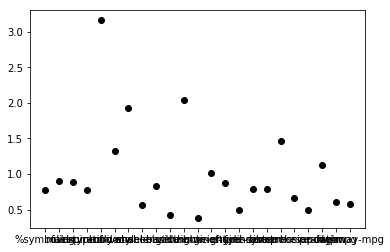

In [7]:
for col in columns:
    plt.plot(col, knn_train_test(col,'price',df_norm,1), '-ok')

## Mission 4: Multivariate Model

### Instructions
    ● Modify the knn_train_test() function to accept a list of column names (instead of just
    one column name as a string). Modify the rest of the function logic to use this parameter:
    
        ○ Instead of using just a single column for train and test, use all of the columns of
        the dataframe except for the target column.

        ○ Use the default k value from scikit-learn for this step(default value is 5).

    ● Use the best 2 features from the previous step to train and test a multivariate k-nearest
    neighbors model using the default k value.
    
    ● Use the best 3 features from the previous step to train and test a multivariate k-nearest
    neighbors model using the default k value.
    
    ● Use the best 4 features from the previous step to train and test a multivariate k-nearest
    neighbors model using the default k value.
    
    ● Use the best 5 features from the previous step to train and test a multivariate k-nearest
    neighbors model using the default k value.
    
    ● Display all of the RMSE values from the above steps.

In [8]:
def knn_train_test(training_col,target_col,dataframe):
    train_df, test_df = train_test_split(dataframe, test_size= 0.2, random_state = 0)
    knn = KNeighborsRegressor(algorithm='brute')
    train_features = train_df[training_col]
    train_target = train_df[[target_col]]
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[training_col])
    rmse_value = np.sqrt(mean_squared_error(test_df[target_col], predictions))
    return rmse_value

print('All Features: ',knn_train_test(columns,'price',df_norm))
print('Best 2 Features: ',knn_train_test(best_features[:2],'price',df_norm))
print('Best 3 Features: ',knn_train_test(best_features[:3],'price',df_norm))
print('Best 4 Features: ',knn_train_test(best_features[:4],'price',df_norm))
print('Best 5 Features: ',knn_train_test(best_features[:5],'price',df_norm))

All Features:  0.446852876766368
Best 2 Features:  0.31168976109736823
Best 3 Features:  0.2788467771084569
Best 4 Features:  0.2724868971074928
Best 5 Features:  0.3000316460472731


## Mission 5: Hyperparameter Tuning

### Instructions
    ● For the best model from the last step, vary the hyperparameter value from 1 to 25 and plot the
    resulting RMSE values.
    
    ● Observe which k value is optimal for the model(least root mean squared error value for k is the optimal value).

In [9]:
rmse_values = []
def knn_train_test(training_col,target_col,dataframe,i):
    for i in range (1,i+1):
        train_df, test_df = train_test_split(dataframe, test_size= 0.2, random_state = 0)
        knn = KNeighborsRegressor(n_neighbors = i,algorithm='brute')
        train_features = train_df[training_col]
        train_target = train_df[[target_col]]
        knn.fit(train_features, train_target)
        predictions = knn.predict(test_df[training_col])
        rmse_values.append(np.sqrt(mean_squared_error(test_df[target_col], predictions))) 
    return rmse_values

Text(0, 0.5, 'rmse_values')

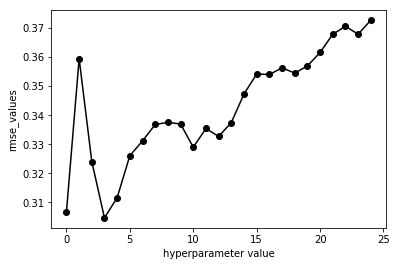

In [10]:
li = knn_train_test(best_features[:2],'price',df_norm,25)
plt.plot(li, '-ok')
plt.xlabel('hyperparameter value')
plt.ylabel('rmse_values')

## Mission 6: K-fold cross validation

### Instructions

    ● Modify the knn_train_test() function to use k-fold cross validation instead of
    test/train validation.

In [11]:
num_folds = 5
chunks = np.array_split(df_norm, num_folds)
for i in range(0,len(chunks)):
    chunks[i]['Fold'] = i
result = pd.concat(chunks)
def train_and_validate(result,folds):
    rmses = []
    for i in range (0,folds):
        model = KNeighborsRegressor()
        train_iteration_one = result[result["Fold"] != i]
        test_iteration_one = result[result["Fold"] == i].copy()
        model.fit(train_iteration_one[best_features[:4]], train_iteration_one["price"])
        test_iteration_one["predicted_price"] = model.predict(test_iteration_one[best_features[:4]])
        iteration_one_mse = mean_squared_error(test_iteration_one["price"],test_iteration_one["predicted_price"])
        rmses.append(iteration_one_mse ** (1/2))
    return rmses
rmses = train_and_validate(result,num_folds)
avg_rmse = np.mean(rmses)
print('rmses: ',rmses,'\n','average rmse: ',avg_rmse)

rmses:  [0.39162869508260145, 0.3203748133535814, 0.3131123997029579, 0.34052815731244, 0.4602489294670044] 
 average rmse:  0.365178598983717
